In [1]:
import pandas as pd

df = pd.read_csv('/content/YoutubeCommentsDataSet.csv')
df.head()


,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [2]:

print("Shape of dataset:", df.shape)


print("\nColumns and Data Types:")
print(df.dtypes)


print("\nMissing Values:")
print(df.isnull().sum())


Shape of dataset: (18408, 2)

Columns and Data Types:
Comment      object
Sentiment    object
dtype: object

Missing Values:
Comment      44
Sentiment     0
dtype: int64


In [3]:

df = df.dropna(subset=['Comment'])


print("New shape after removing missing comments:", df.shape)


New shape after removing missing comments: (18364, 2)


/tmp/ipython-input-5-455649684.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set2')


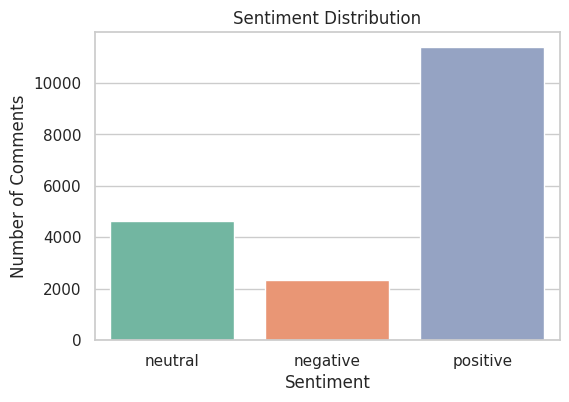

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sentiment', palette='Set2')


plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.show()


In [6]:
import re
import string


def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    return text


df['Cleaned_Comment'] = df['Comment'].apply(clean_text)


df[['Comment', 'Cleaned_Comment']].head()


,Comment,Cleaned_Comment
0,lets not forget that apple pay in 2014 require...,lets not forget that apple pay in required a ...
1,here in nz 50 of retailers don’t even have con...,here in nz of retailers dont even have contac...
2,i will forever acknowledge this channel with t...,i will forever acknowledge this channel with t...
3,whenever i go to a place that doesn’t take app...,whenever i go to a place that doesnt take appl...
4,apple pay is so convenient secure and easy to ...,apple pay is so convenient secure and easy to ...


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(max_features=5000)  # limit to top 5000 words


X = tfidf.fit_transform(df['Cleaned_Comment']).toarray()


X.shape


(18364, 5000)

In [9]:
import numpy as np
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

y = le.fit_transform(df['Sentiment'])


np.unique(y, return_counts=True)


(array([0, 1, 2]), array([ 2337,  4625, 11402]))

In [11]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 14691
Test size: 3673


In [13]:
from sklearn.model_selection import train_test_split

# Split the TF-IDF numeric data (X) and encoded labels (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 14691
Test size: 3673


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Cleaned_Comment']).toarray()


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: {:.2f}%".format(accuracy * 100))


print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 75.82%

Classification Report:
              precision    recall  f1-score   support

    negative       0.60      0.32      0.42       441
     neutral       0.63      0.59      0.61       912
    positive       0.81      0.91      0.86      2320

    accuracy                           0.76      3673
   macro avg       0.68      0.61      0.63      3673
weighted avg       0.74      0.76      0.74      3673


Confusion Matrix:
[[ 141  137  163]
 [  58  535  319]
 [  36  175 2109]]


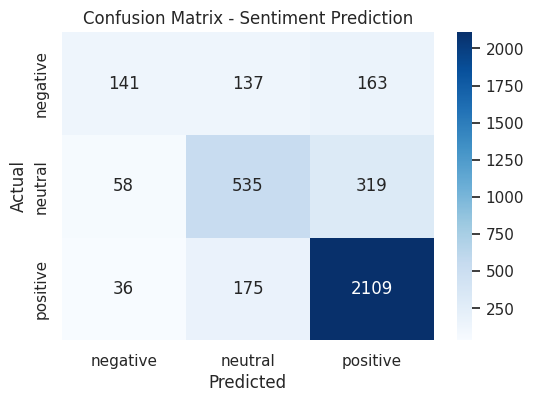

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Sentiment Prediction')
plt.show()
